In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('data2.csv')

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB
None


In [ ]:
df['Дата'] = pd.to_datetime(df['Дата'],dayfirst=True,errors='coerce' )


In [21]:
df = df.dropna(subset=['Дата'])

In [23]:
grouped_df = (df.groupby('Дата', as_index=False).agg(sales_count=('Количество', 'sum')))

In [25]:
print("=== Несколько строк grouped_df ===")
print(grouped_df.head(), end="\n\n")

=== Несколько строк grouped_df ===
        Дата  sales_count
0 2018-01-02         3770
1 2018-01-03         3848
2 2018-01-04         3786
3 2018-01-05         4221
4 2018-01-06         4736



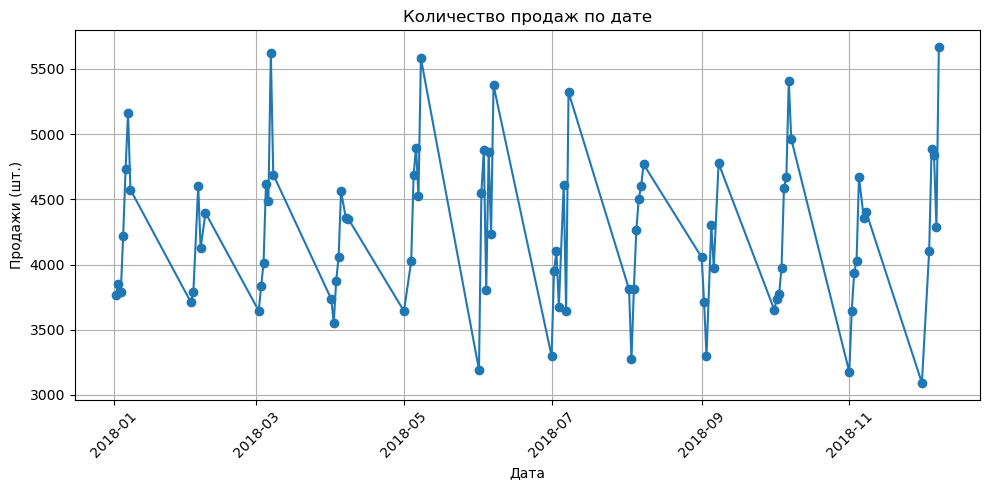

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(grouped_df['Дата'], grouped_df['sales_count'], marker='o', linestyle='-')
plt.title('Количество продаж по дате')
plt.xlabel('Дата')
plt.ylabel('Продажи (шт.)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
grouped_df['z_score'] = ((grouped_df['sales_count'] - grouped_df['sales_count'].mean())/ grouped_df['sales_count'].std())
outlier = grouped_df.loc[grouped_df['z_score'].abs().idxmax()]
print("=== Строка с максимальным выбросом ===")
print(outlier, end="\n\n")


=== Строка с максимальным выбросом ===
Дата           2018-12-08 00:00:00
sales_count                   5667
z_score                    2.37524
Name: 79, dtype: object



In [31]:
mask_wed = ((df['Склад'] == 3) &(df['Дата'].dt.month.isin([6, 7, 8])) &(df['Дата'].dt.weekday == 2)   # 0=понедельник, 2=среда)
top_product = (df[mask_wed].groupby('Номенклатура', as_index=False).agg(total_qty=('Количество', 'sum'))
               .sort_values('total_qty', ascending=False).head(1))
print("=== Топовый товар по средам (июнь–август) на складе 3 ===")
print(top_product)

=== Топовый товар по средам (июнь–август) на складе 3 ===
  Номенклатура  total_qty
1    product_1        479
